# Linear Regression- Code Explanation

### Imports

In [1]:
#Importing Libraries
import pickle
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

### Reading the dataset

**Dataset Name:** Used car price dataset

**Dataset Source:** https://www.kaggle.com/datasets/kukuroo3/used-car-price-dataset-competition-format

In [2]:
# Loading the dataset
cars = pd.read_csv("cars.csv")

### Exploring the dataset

In [3]:
# Displaying the columns
cars.columns

Index(['price', 'brand', 'year', 'transmission', 'fuelType', 'tax', 'mileage',
       'engineSize'],
      dtype='object')

In [4]:
# Showing the top 5 rows of the dataset
cars.head()

,price,brand,year,transmission,fuelType,tax,mileage,engineSize
0,31995,hyundi,2019,Semi-Auto,Diesel,145.0,39.8,2.2
1,7700,vauxhall,2015,Manual,Diesel,125.0,60.1,2.0
2,58990,audi,2019,Automatic,Petrol,145.0,29.1,2.9
3,12999,vw,2016,Automatic,Diesel,30.0,57.6,2.0
4,16990,skoda,2020,Semi-Auto,Petrol,145.0,47.1,1.0


In [5]:
# Showing the data info
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4960 non-null   int64  
 1   brand         4960 non-null   object 
 2   year          4960 non-null   int64  
 3   transmission  4960 non-null   object 
 4   fuelType      4960 non-null   object 
 5   tax           4960 non-null   float64
 6   mileage       4960 non-null   float64
 7   engineSize    4960 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 310.1+ KB


## Linear regression

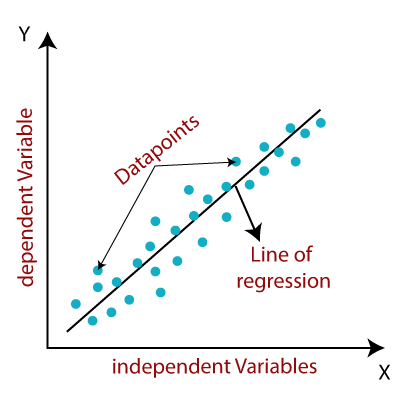

Linear regression is a statistical technique used to model the relationship between a dependent variable (usually denoted as "y") and one or more independent variables (usually denoted as "x"). It assumes a linear association between the variables, meaning that changes in the independent variable(s) result in a proportional change in the dependent variable. The goal of linear regression is to find the best-fitting line (or hyperplane in multiple dimensions) that minimizes the difference between the observed and predicted values. This is typically done by minimizing the sum of squared differences, a method known as least squares regression.

Simple linear regression involves the relationship between one independent variable and a dependent variable, represented by a straight line. 

In contrast, multiple linear regression considers more than one independent variable, allowing for a more complex relationship between them and the dependent variable, often represented by a hyperplane in higher dimensions. This enables the model to capture the combined effect of multiple factors on the outcome variable.

**Formula:** $$  y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p + \epsilon \ $$

## Significance of features

### Analyzing the relationship between mileage and car price

In [6]:
# Analyzing effect of mileage on car prices
X = cars['mileage']
y = cars['price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     162.1
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           1.44e-36
Time:                        23:58:35   Log-Likelihood:                -55097.
No. Observations:                4960   AIC:                         1.102e+05
Df Residuals:                    4958   BIC:                         1.102e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.758e+04    396.170     69.626      0.0

**Observations:**

1. Expensive cars tend to have lesser mileage.
2. Mileage is a significant predictor of Car Price.

Formula: $$ CarPrice = 28316.30 + -96.99*Mileage $$

### Analyzing the effect of mileage, tax, engine size, year, fuel type and transmission on car price

In [7]:
# Analyzing the combined effect of variables on car prices
reg = smf.ols('price~mileage+tax+C(transmission)+C(fuelType)+engineSize+year', data=cars).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     914.7
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:58:35   Log-Likelihood:                -52424.
No. Observations:                4960   AIC:                         1.049e+05
Df Residuals:                    4948   BIC:                         1.050e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -5.198e+06      1e+05    -51.766      0.000    -5.4e+06      -5e+06
C(transmission)[T.Manual]    -5372.0273    374.991    -14.326      0.000   -6107.175   -4636.879
C(transmission)[T.Other]     -3373.7556   9440.929     -0.357      0.721   -2.19e+04    1.51e+04
C(transmission)[T.Semi-Auto]  1282.5317    364.555      3.518      0.000     567.843    1997.220
C(fuelType)[T.Electric]       9149.1824   6975.490      1.312      0.190   -4525.872    2.28e+04
C(fuelType)[T.Hybrid]         2366.4596    861.189      2.748      0.006     678.146    4054.773
C(fuelType)[T.Other]           447.5330   1969.788      0.227      0.820   -3414.126    4309.192
C(fuelType)[T.Petrol]         3489.1807    296.342     11.774      0.000    2908.219    4070.142
mileage                         14.6378      4.997      2.929      0.003       4.842      24.434
tax                            -14.9635      1.994     -7.505      0.000     -18.872     -11.055
engineSize                    1.237e+04    225.913     54.757      0.000    1.19e+04    1.28e+04
year                          2577.0954     49.740     51.811      0.000    2479.583    2674.608
==============================================================================
Omnibus:                     2416.232   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29528.076
Skew:                           2.020   Prob(JB):                         0.00
Kurtosis:                      14.250   Cond. No.                     1.52e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observations:**

1. The less common transmission types and fuel types do not have much significance on Car Price.
2. Electric fuel type cars are more expensive than other fuel type cars.
3. Manual transmission cars are cheaper than automatic transmission cars.
4. Engine Size is a significant predictor of car price with a positive relationship.

### Checking model performance and violations

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

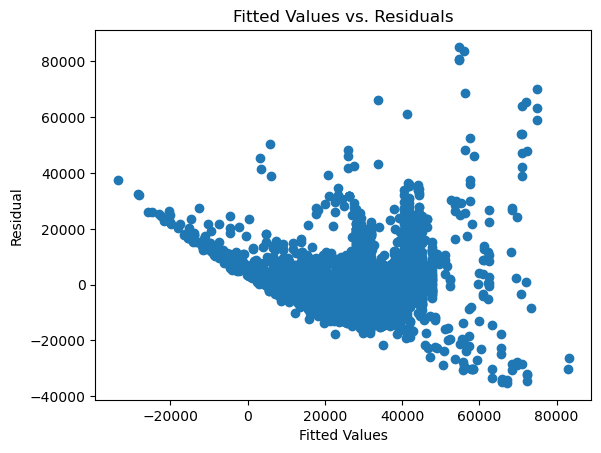

In [8]:
#Fitted Values vs. Residuals
p = reg.fittedvalues
res = reg.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

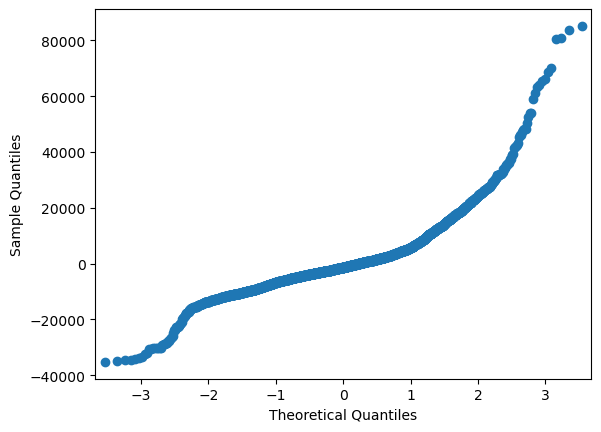

In [9]:
#qq plot
sm.qqplot(reg.resid)
plt.show()

**Observation:**
There is a pattern present in the residual plot and QQ plot is also not straight, the linear regression assumption may be violated which means linear regression is not the best prediction model for this dataset.

### Sequential F-Test

In [10]:
# Showing the type-1 ANOVA test results
anova_results_typ1 = sm.stats.anova_lm(reg, typ=1)
anova_results_typ1

,df,sum_sq,mean_sq,F,PR(>F)
C(transmission),3.0,3.633522e+11,1.211174e+11,1361.867934,0.000000e+00
C(fuelType),4.0,8.367729e+09,2.091932e+09,23.522097,2.719083e-19
mileage,1.0,2.090417e+10,2.090417e+10,235.050604,7.231727e-52
tax,1.0,2.808124e+08,2.808124e+08,3.157510,7.563981e-02
engineSize,1.0,2.631736e+11,2.631736e+11,2959.175383,0.000000e+00
year,1.0,2.387372e+11,2.387372e+11,2684.408382,0.000000e+00
Residual,4948.0,4.400492e+11,8.893477e+07,NaN,NaN


### Marginal F-Test

In [11]:
# Showing the type-2 ANOVA test results
anova_results_typ2 = sm.stats.anova_lm(reg, typ=2)
anova_results_typ2

,sum_sq,df,F,PR(>F)
C(transmission),2.974857e+10,3.0,111.499584,7.339433e-70
C(fuelType),1.305951e+10,4.0,36.710930,2.731887e-30
mileage,7.631446e+08,1.0,8.580948,3.412502e-03
tax,5.009444e+09,1.0,56.327172,7.234869e-14
engineSize,2.666571e+11,1.0,2998.344963,0.000000e+00
year,2.387372e+11,1.0,2684.408382,0.000000e+00
Residual,4.400492e+11,4948.0,NaN,NaN


**Obeservations**:
1. All variables in the order: [transmission -> fuelType -> mileage -> tax -> engineSize -> year] are significant.
2. Each variable is significant given all other variables.

## Car Price Prediction

In [12]:
# Preview of the data
cars.head()

,price,brand,year,transmission,fuelType,tax,mileage,engineSize
0,31995,hyundi,2019,Semi-Auto,Diesel,145.0,39.8,2.2
1,7700,vauxhall,2015,Manual,Diesel,125.0,60.1,2.0
2,58990,audi,2019,Automatic,Petrol,145.0,29.1,2.9
3,12999,vw,2016,Automatic,Diesel,30.0,57.6,2.0
4,16990,skoda,2020,Semi-Auto,Petrol,145.0,47.1,1.0


### Pre-processing the data

In [13]:
# Encoding categorical variables
cars_encoded = pd.get_dummies(cars, columns=['brand', 'transmission', 'fuelType'])

### Splitting the data

In [14]:
# Define features (X) and target variable (y)
X = cars_encoded.drop('price', axis = 1)
y = cars_encoded['price']

### Training the model

In [15]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

### Exporting the model into pickle file

In [16]:
# Saving the model results in pickle file
pickle.dump(model, open('model.pkl', 'wb'))